In [29]:
#bibliotecas para usar com o Jupyter
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
#importando a imagem
imagemInicial = cv2.imread("IMG_20180807_174005423.jpg")

In [31]:
#redimensionando a imagem para facilitar a extração dos dados
imagemInicial =  cv2.resize(imagemInicial,(600,800))

In [32]:
#convertendo para escalas de cinza, para que fique mais fácil de manipular a imagem
cinza = cv2.cvtColor(imagemInicial, cv2.COLOR_BGR2GRAY)

In [33]:
#passando no primeiro filtro de Gauss
filtroGauss = cv2.GaussianBlur(cinza, (5,5),0)

In [34]:
#filtro de Threshold
#threshold = cv2.threshold(filtroGauss,127,255,cv2.THRESH_TOZERO)

In [35]:
#buscando os contornos externos da imagem com o operador Canny
contornosExternos = cv2.Canny(filtroGauss, 0 ,50)

In [36]:
#buscando os contornos da imagem
#cv2.RETR_LIST : Recupera todos os contornos, mas não cria relacionamento entre os dados
#CHAIN_APPROX_SIMPLE : Recupera todos os pontos do contorno, não somente os limites superiores da imagem.

_,contornos, _ = cv2.findContours(contornosExternos, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [37]:
#classificando a área dos contornos identificados
contornos = sorted(contornos, key=cv2.contourArea, reverse= True)


In [38]:
#Desenhando os contornos da imagem

#cv2.arcLength : Cria os contornos da imagem de interesse

#cv2.approxPolyDP : Mostra a curva criada para os contornos da imagem. 

for i in contornos:
	elipse =  cv2.arcLength(i, True)
	aproximacao = cv2.approxPolyDP(i,0.08*elipse, True)

	if len(aproximacao) == 4 :
		documentoMatriz = aproximacao
		break

In [39]:
#Desenhando os contornos da imagem, em que as bordas mostradas na cor verde
cv2.drawContours(imagemInicial, [documentoMatriz], -1,(0,255,0),2)
#Redimensionando a matriz para evitar erros à frente.  A Matriz terá a dimensão 4x2
documentoMatriz = documentoMatriz.reshape((4,2))

In [40]:
#Criando uma nova matriz 4x2 para manipular a frente os dados da imagem
novoDocumentoMatriz = np.zeros((4,2), dtype="float32")

In [41]:
#Fazendo a soma dos valores do eixo da linha, criando um vetor com os valores obtidos.
soma = documentoMatriz.sum(axis = 1 )

In [42]:
#Adicionando valores a matriz criada
#Retorna o valor minimo do eixo
novoDocumentoMatriz[0] = documentoMatriz[np.argmin(soma)]
#Retorna o valor minimo do eixo
novoDocumentoMatriz[2] = documentoMatriz[np.argmax(soma)]

In [43]:
#Fazendo a diferença dos eixos 
diferenca =  np.diff(documentoMatriz, axis = 1)

In [44]:
#Adicionando valores a matriz criada
#Retorna o valor minimo do eixo
novoDocumentoMatriz[1] = documentoMatriz[np.argmin(diferenca)]
#Retorna o valor máximo do eixo
novoDocumentoMatriz[3] = documentoMatriz[np.argmax(diferenca)]

In [45]:
(tl,tr,br,bl) = novoDocumentoMatriz

In [46]:
#Encontrando a distância entre os pontos e obtenha o valor máximo
#normalizando os dados obtidos
distancia1 = np.linalg.norm(br-bl)
distancia2 = np.linalg.norm(tr-tl)

In [47]:
#Encontrando o valor máximo das distâncias
tamanhoMaximo = max(int(distancia1), int(distancia2))

In [48]:
#Encontrando a distância entre os pontos e obtenha o valor máximo
#normalizando os dados obtidos
distancia3 = np.linalg.norm(tr-br)
distancia4 = np.linalg.norm(tl-bl)

In [49]:
#Encontrando a altura máxima das distâncias
alturaMaxima = max(int(distancia3), int(distancia4))

In [50]:
#criando uma matriz com os valores máximos obtidos
dst = np.array([[0,0],[tamanhoMaximo-1, 0],[tamanhoMaximo-1, alturaMaxima-1], [0, alturaMaxima-1]], dtype="float32")

In [51]:
N = cv2.getPerspectiveTransform(novoDocumentoMatriz, dst)

In [52]:
# Criando a deformação da perspectiva
deformacao = cv2.warpPerspective(imagemInicial, N, (tamanhoMaximo, alturaMaxima))

In [53]:
#Criando uma nova imagem com o processamento obtido
imagemSaida = cv2.cvtColor(deformacao, cv2.COLOR_BGR2GRAY)
#Redimensionando a imagem
imagemSaida = cv2.resize(imagemSaida,(600,800))

In [54]:
# Demonstração em Janelas das imagens processadas

#cv2.imshow("Original.jpg",img)
#cv2.imshow("Scanned.jpg", img2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

#cv2.imshow("Imagem Original",imagemInicial)
#cv2.imshow("Escala de Cinza",cinza)
#cv2.imshow("Filtro Gaussiano",filtroGauss)
#cv2.imshow("Contornos com operador de Canny",contornosExternos)
#cv2.imshow("Threshold",threshold)
#cv2.imshow("Contornos", imagemInicial)
#cv2.imshow("Escaneado", imagemSaida)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

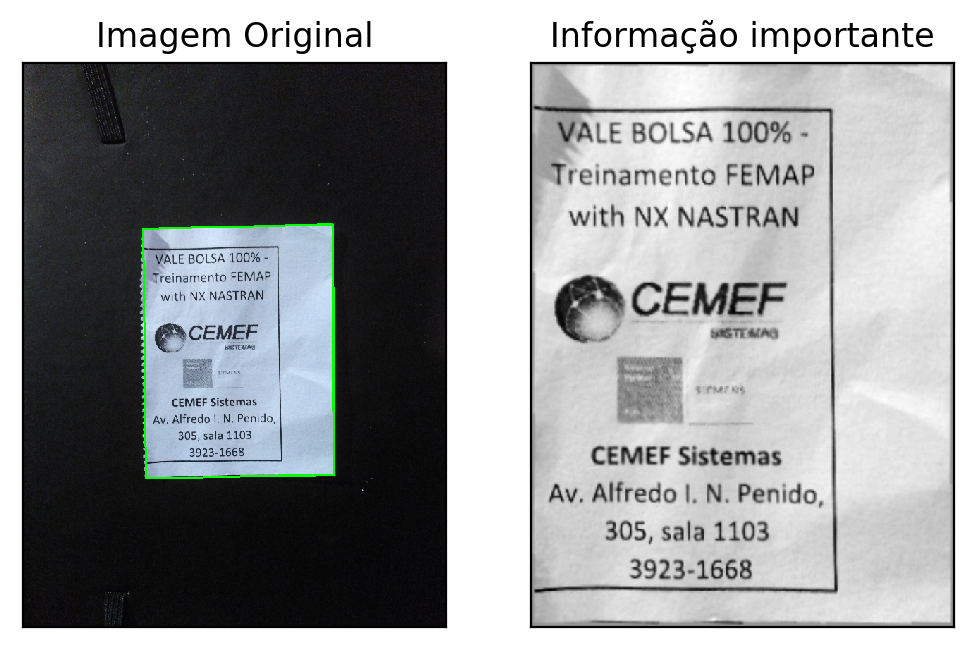

In [56]:
plt.subplot(121),plt.imshow(imagemInicial),plt.title('Imagem Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imagemSaida),plt.title('Informação importante')
plt.xticks([]), plt.yticks([])
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 200
plt.show()

Referências : <br>
    <br><a href = 'https://github.com/AmeyCaps'>Amey Umarekar</a> : <a href='https://github.com/AmeyCaps/Document_Scanner/blob/master/scan_doc.py'>Projeto</a> <br>
    <a href='https://www.pyimagesearch.com/author/adrian/'>Adrian Rosenbrook</a> :  <a href='https://www.pyimagesearch.com/2014/09/01/build-kick-ass-mobile-document-scanner-just-5-minutes/'>Artigo original</a> <a href='https://www.pyimagesearch.com/2014/08/25/4-point-opencv-getperspective-transform-example/'>Artigo de apoio</a><br>